In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

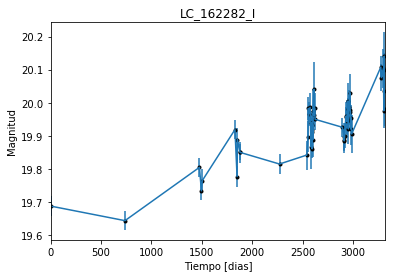

In [2]:
data = np.genfromtxt('LC_162282_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_162282_I')
plt.savefig("LC_162282_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

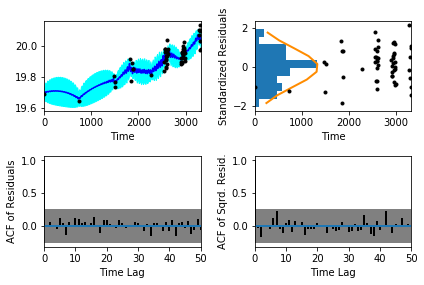

In [5]:
sample.assess_fit()

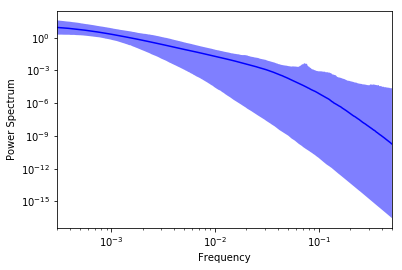

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

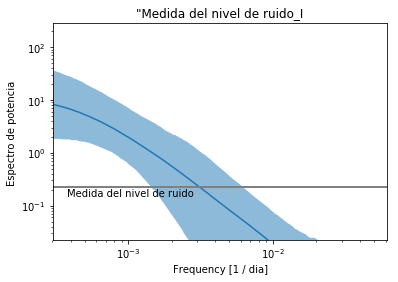

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_162282_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_162282_I')

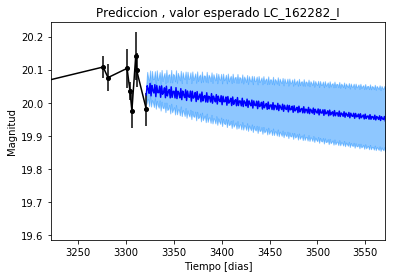

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_162282_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_162282_I')

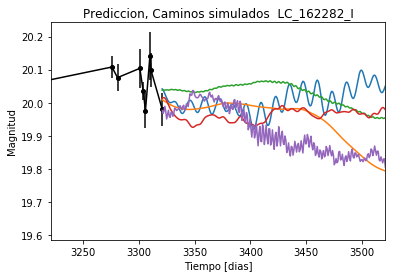

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_162282_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


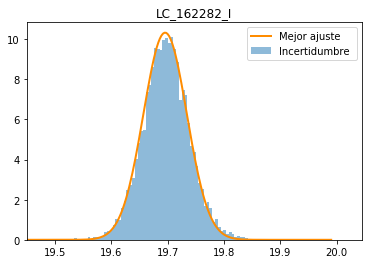

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_162282_I')
plt.savefig("Mejor_ajuste_LC_162282_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_162282_I')

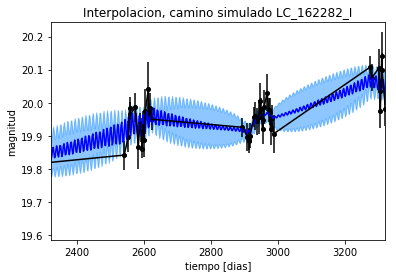

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_I')

Text(0.5,1,'Interpolacion, camino simulado LC_162282_I')

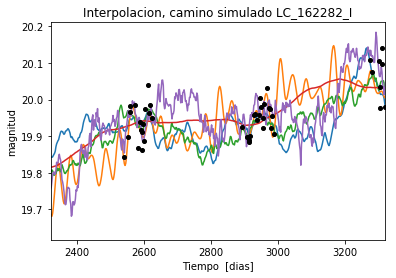

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 767.021201072
Median: 0.0172516296716
Standard deviation: 0.195741741231
68% credibility interval: [ 0.00155266  0.22826559]
95% credibility interval: [  4.10616776e-04   7.61146226e-01]
99% credibility interval: [  3.24315769e-04   9.37506504e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 438.302022979
Median: 0.00576053333891
Standard deviation: 0.0960886014168
68% credibility interval: [ 0.00066015  0.05718861]
95% credibility interval: [ 0.00033513  0.31196541]
99% credibility interval: [  3.07627157e-04   7.38292575e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 510.577532693
Median: 0.0761525119476
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1387.43270494
Median: 105.764053269
Standard deviation: 1.92724850887
68% credibility interval: [ 103.73927734  107.43203269]
95% credibility interval: [ 101.2524811  108.7351873]
99% credibility interval: [  99.39151919  109.98696875]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 515.472187384
Median: 1.22774271389
Standard deviation: 2.35383018227
68% credibility interval: [ 0.17326952  4.59172178]
95% credibility interval: [ 0.02554407  8.10683426]
99% credibility interval: [  0.01238408  11.39629693]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 387.136095071
Median: 1.08637192389
Standard deviation: 9.92109975285
68% credibility interval: [  0.07264659  11.53919882]
95% credibility interval: [  5.93959131e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5391.42080682
Median: 1.29400060577e-41
Standard deviation: 6.22437068168e+32
68% credibility interval: [  7.21134128e-74   1.29159356e-17]
95% credibility interval: [  1.22367752e-101   1.85082370e-001]
99% credibility interval: [  1.74335506e-107   3.97020241e+013]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1874.5946979
Median: 19.8297400132
Standard deviation: 0.0668251502535
68% credibility interval: [ 19.77165953  19.88976575]
95% credibility interval: [ 19.69139518  19.96052871]
99% credibility interval: [ 19.63402213  20.02548772]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 655.798661548
Median: 0.0549440975341
Standard deviation: 0.248549878535
68% credibility interval: [ 0.          0.44541403]
95% credibility interval: [ 0.          0.87770311]
99% credibility interval: [ 0.          0.96711739]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 655.798661548
Median: 0.0549440975341
Standard deviation: 0.248549878535
68% credibility interval: [ 0.          0.44541403]
95% credibility interval: [ 0.          0.87770311]
99% credibility interval: [ 0.          0.96711739]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1296.20994442
Median: 0.0
Standard deviation: 0.000430044437683
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1387.43270494
Median: 105.764053269
Standard deviation: 1.92724850887
68% credibility interval: [ 103.73927734  107.43203269]
95% credibility interval: [ 101.2524811  108.7351873]
99% credibility interval: [  99.39151919  109.98696875]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1173.28982314
Median: 0.0177236513124
Standard deviation: 0.0158192044175
68% credibility interval: [ 0.01102413  0.03016152]
95% credibility interval: [ 0.00742492  0.05921245]
99% credibility interval: [ 0.0058228   0.10269674]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 446.956867989
Median: 0.96296748455
Standard deviation: 0.178701427336
68% credibility interval: [ 0.80300812  1.15358876]
95% credibility interval: [ 0.68589464  1.38213235]
99% credibility interval: [ 0.62755699  1.55276535]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 450.330883057
Median: 0.00142644124368
Standard deviation: 0.160932610737
68% credibility interval: [  2.16047522e-05   4.25086992e-02]
95% credibility interval: [  2.76851276e-07   4.72574017e-01]
99% credibility interval: [  9.14130513e-18   1.23800791e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 767.021201072
Median: (-0.108395186078-0.246689781395j)
Standard deviation: 1.98783014796
68% credibility interval: [-1.43423501-0.29678578j -0.00975563-0.49516264j]
95% credibility interval: [ -4.78242278e+00+0.j          -2.57998129e-03-0.23327388j]
99% credibility interval: [ -5.89052709e+00-4.7907519j   -2.03773608e-03-0.00671609j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 438.302022979
Median: (-0.0361944984366+0.086976362386j)
Standard deviation: 1.67432519533
68% credibility interval: [-0.35932662+0.23769229j -0.00414786+1.82509691j]
95% credibility interval: [-1.96013651+1.58362392j -0.00210567+0.j        ]
99% credibility interval: [ -4.63882906e+00+2.55310523j  -1.93287843e-03+0.j        ]
Posterior sum